# NSF

In [3]:
# Libraries

from os.path import join
from os import listdir
from bs4 import BeautifulSoup
import pandas as pd

## 1. Parsing XML

In [ ]:
# Option 1: List of file paths for all years

years = list(range(2002,2021))
filelist = []

for year in years:
    folder_path = join('data/nsf/'+str(year))
    filelist.extend([join(folder_path,f) for f in listdir(folder_path)])

In [ ]:
# Option 2: Filelist year by year

year = 2020
folder_path = join('data/nsf/'+str(year))
filelist = []
filelist.extend([join(folder_path,f) for f in listdir(folder_path)])

In [ ]:
# Option 3: File by file (testing purposes)

xmlfile = open('data/nsf/2002/0200014.xml','r')
xml_soup = BeautifulSoup(xmlfile,'xml')
for element in xml_soup.find_all():
    for column in list(xml_df):
        if(element.name==column):
            dict_aux[column] = element.string

xml_df = xml_df.append(dict_aux,ignore_index=True)

In [101]:
# XML Schema

xsd_file = open('data/nsf/Award.xsd','r')
xsd_soup = BeautifulSoup(xsd_file)

tags = []
for element in xsd_soup.find_all('xsd:element'):
    tags.append(element['name'])

In [102]:
# Build dataframe (Options 1 & 2)

xml_df = pd.DataFrame(columns=tags)
dict_aux = {}

for file in filelist:
    xmlfile = open(file,'r')
    xml_soup = BeautifulSoup(xmlfile,'xml')
    for element in xml_soup.find_all(): 
        for column in list(xml_df):
            if(element.name==column):
                dict_aux[column] = element.string
    xml_df = xml_df.append(dict_aux,ignore_index=True)
    dict_aux = {}

In [104]:
# Write dataframe to csv file (Option 2: year by year)

xml_df.to_csv('data/nsf/nsf_2020.csv')

In [53]:
# Load csvs into joint dataframe (Option 2: year by year)

columns_dates = ['AwardEffectiveDate','AwardExpirationDate']
nsf_list = []

for file in listdir("data/nsf"):
    if file.endswith(".csv"):
        df = pd.read_csv(join('data/nsf',file),parse_dates=columns_dates)
        nsf_list.append(df)

nsf = pd.concat(nsf_list)
nsf.to_csv('data/nsf/nsf.csv')

## 2. Preprocessing

In [79]:
# Load csv (Option 1: all in one)

columns_dates = ['AwardEffectiveDate','AwardExpirationDate','MinAmdLetterDate','MaxAmdLetterDate']
nsf = pd.read_csv('data/nsf/nsf.csv',parse_dates=columns_dates)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (28,32,33,35,44,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
# Find columns with most of their values nulls

cols_to_drop = []

for col in nsf.columns:
    if(nsf[col].isnull().sum() > 12000):
        cols_to_drop.append(col)

In [108]:
# Drop useless columns

cols_to_drop.extend(['Unnamed: 0','Unnamed: 0.1','Code','LongName.1','Code.1','Name.1','Code.2','Code.3',
                     'AwardEffectiveDate','AwardExpirationDate'])

nsf = nsf.drop(columns=cols_to_drop)

## 3. Descriptive analysis

### Award Amount

In [112]:
nsf['AwardAmount'].mean()

509660.8300755549

<AxesSubplot:>

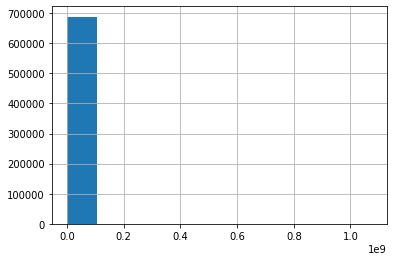

In [126]:
nsf['AwardAmount'].hist()

### Value

In [119]:
nsf['Value'].value_counts()

Standard Grant                       478017
Continuing Grant                     108762
Continuing grant                      72387
Fellowship Award                      10611
Fellowship                             8865
Cooperative Agreement                  5247
Contract Interagency Agreement         2232
Interagency Agreement                  1596
Contract                                333
BOA/Task Order                          294
Fixed Price Award                       102
Fixed Amount Award                       51
Intergovernmental Personnel Award         6
Personnel Agreement                       3
Name: Value, dtype: int64

### Country Name

In [122]:
nsf['CountryName'].value_counts()

United States      676689
Bermuda               336
Canada                192
United Kingdom        162
France                 99
Germany                81
Uruguay                60
Sweden                 45
Switzerland            30
Australia              24
New Zealand            12
Austria                12
Denmark                12
Netherlands             9
Russia                  9
Italy                   9
Paraguay                6
Spain                   6
Finland                 6
Japan                   6
Puerto Rico             6
Israel                  3
Turkey                  3
Belgium                 3
Cameroon                3
Ukraine                 3
Antarctica              3
Taiwan                  3
Germany, Berlin         3
Mexico                  3
Colombia                3
Sri Lanka               3
India                   3
Venezuela               3
Australasia             3
South Africa            3
Estonia                 3
Name: CountryName, dtype: int64

### State Name

In [123]:
nsf['StateName'].value_counts()

California              85851
New York                52173
Massachusetts           45240
Texas                   36471
Pennsylvania            35313
Illinois                29883
Michigan                22875
North Carolina          21090
Florida                 20571
Virginia                19275
Colorado                18813
Maryland                17589
Ohio                    17370
Georgia                 17256
Indiana                 16530
New Jersey              16380
Washington              15879
Arizona                 15525
Wisconsin               11946
District of Columbia    11568
Minnesota               10599
Oregon                  10038
Connecticut              9348
Missouri                 8631
Tennessee                8184
Rhode Island             7632
Iowa                     7116
Utah                     7002
South Carolina           6408
Alabama                  6069
Louisiana                6033
New Mexico               5409
Kansas                   4740
Hawaii    